**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0).
The total score must be re-scaled to 100 -- that should apply to all future assignments so that Canvas assigns the same weight on all assignments.



# **Assignment 2**

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


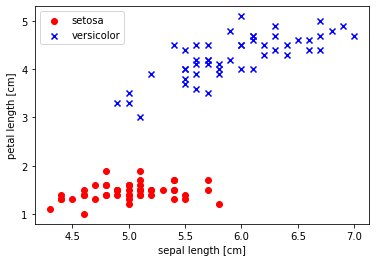

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



## <font color='#008DFF'> **Question 0. Manual Perceptron Training**

Below you can see the first 5 data points of the data set, all labeled as 'setosa'.

In [ ]:
X[0:5], y[0:5]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are w0=0.1, w1=0.2, w2=-0.1 . Here $w_0$ is the bias.

In the following space (Double click this text), write the weights after processing data points 0,1,2, and show your calculations (with $\eta = 0.1$):

----
<b><u>Solution </b> </u>

After processing data points 0,1,2, weights are as below

w1 = -0.82 <br>
w2 = -0.38 <br>
w0 (bias) = -0.1<br>

----

<b><u>Calculation </b> </u>

<b>Activation : </b>

z =  1, if $w^Tx$ + b > 0<br>
z = -1, if $w^Tx$ + b <= 0

<b>For first input: x[0] </b>

X1 = 5.1 ; X2 = 1.4 ; y (expected) = -1 ; w0 (bias/intercept) = 0.1 ; w1 = 0.2 ; w2 = -0.1  <br>
Weighted Sum = w1*X1 + w2*X2 + b = (0.2 * 5.1) + (-0.1 * 1.4) + 0.1 = 0.98 (which is greater than 0)<br>

z = 1 <br>
Predicted y value is 1 and Expected y value is -1. This is an error. Hence the weights need to be updated using the updated rule.


w1 = w1 - $\eta$ * (Predicted - Expected) * x1 = 0.2 - (0.1 * (1+1) * 5.1) = 0.2 - (0.1*2*5.1) = -0.82<br>
w2 = w2 - $\eta$ * (Predicted - Expected) * x2 = -0.1 - (0.1 * (1+1) * 1.4) = -0.1 - (0.1*2*1.4) = -0.38 <br>
b = b - $\eta$ * (Predicted - Expected) = 0.1 - (0.1* 2 ) = -0.1 <br>

<br>
<b>
Weights after first input: w1 = -0.82 ; w2 = -0.38 ; w0 (or b) = -0.1<br>
<br>
</b>
<br>
<b>For second input: x[1] </b>

X1 = 4.9 ; X2 = 1.4 ; y (expected) = -1 ; w0 (bias/intercept) = -0.1 ; w1 = -0.82 ; w2 = -0.38 <br>
Weighted Sum = w1*X1 + w2*X2 + b = (-0.82 * 4.9) + (-0.38 * 1.4) + (-0.1) = -4.65 (which is lesser than 0) <br>

z = -1 <br>
Predicted y value is -1 and Expected y value is -1. No Error. Hence the weights and bias remain the same.<br>

<br>
<b>
Weights after second input: w1 = -0.82 ; w2 = -0.38 ; w0 (or b) = -0.1<br>
<br>
</b>
<br>

<b>For third input: x[2] </b>

X1 = 4.7 ; X2 = 1.3 ; y (expected) = -1 ; w0 (bias/intercept) = -0.1 ; w1 = -0.82 ; w2 = -0.38 <br>
Weighted Sum = w1*X1 + w2*X2 + b = (-0.82 * 4.7) + (-0.38 * 1.3) + (-0.1) = -4.448 (which is lesser than 0)<br>

z = -1 <br>
Predicted y value is -1 and Expected y value is -1. No Error. Hence the weights and bias remain the same.<br>

<br>
<b>
Weights after third input: w1 = -0.82 ; w2 = -0.38 ; w0 (or b) = -0.1<br>
<br>
</b>
<br>










In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0

maxScore = maxScore +4
M[0,1] = 4

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 1. Perceptron Code Modification**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    trained_iter_ : int
      Max Passes over the training set to get errors_ count as 0
    weights_hist_ : list
      History of Weights

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        # ------------Modified Code-------
        # Intializing an attribute to store weight history. First value would be random weights that were chosen.
        self.weights_hist_ = []
        self.weights_hist_.append(self.w_)
        # Intializing an attribute to store Max iterations that were necessary for the training dataset
        self.trained_iter_ = 0
        # ------------Modified Code-------

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

                # ------------Maintain Weight History----
                self.weights_hist_.append(self.w_)
                # ------------Maintain Weight History----

            self.errors_.append(errors)

            # ------------Stop iterating after error count is 0 for an epoch-----
            if errors == 0:
                self.trained_iter_ = _ + 1
                break
            # ------------Stop iterating after error count is 0 for an epoch-----

            # my do-nothing code
            IK = 2020
            # my do-nothing code

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


Work on the above cell and modify the code so that:

(i) The fit function stops when no more iterations are necessary. <br>
(ii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training <br>
(iii) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

To modify the code please insert your code with clear comments surrounding it, similarly to "my do-nothing code". Make sure you evaluate the cell again,  so that following cells will be using the modified perceptron.



In [ ]:
# Grader's area

maxScore = maxScore +12
M[1,1] = 4
M[1,2] = 4
M[1,3] = 2

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question2: Experimenting with hyperparameters**

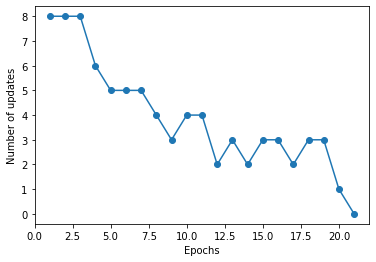

In [ ]:

ppn = Perceptron(eta=0.00005,  random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()



Running the above code, you can verify if your modification in question 1 works correctly. The point of this question is to experiment with the different hyperparameters. Here are some specific questions:<br>
(i) Find the largest value of $\eta$ for which the process takes more than 20 iterations to converge. Explain how you found that $\eta$ <br>
(ii) Are you able to find $\eta>1$ for which the process fails to converge in less than 30 iterations? <br>
(iii) Find two different settings for the random state, that give different convergence patterns, for the same $\eta$.

Please give your answers in the cell below.

In [ ]:
# Check the iterations count required to get error = 0
print("Number of iterations that were required : {}".format(ppn.trained_iter_))

Number of iterations that were required : 21



<br>Double click here to type your answer
<br>
<br>
<b> Answers </b> <br>
<br> (i) eta=0.00005. <br>To get the eta value where the required iterations to get error count as 0 should be greater the 20, used the trial and error method. Also, with decrease in ETA, the number of iterations taken by the process to converge increases. For eta=0.00006, process converges at iteration 19. For eta=0.00005, we get 21. For eta=0.00004, iterations count is 23.  So if we further increase the eta from 0.00006, we end up getting iterations count lesser than 20.
<br>
So as per the observations from the convergence plot, chose eta=0.00005 as it converges at 21st iteration

<br>
<br> (ii) No. <br>For eta >= 1, the required iterations count is 6. So even if we increase the eta value, the required iterations is always 6. So there is no eta > 1 which would fail converge in less than 30 iterations.
<br>
<br> (iii) With eta=0.0001, for random_state = 5, process converges at iteration 2. Please see the plots below. <br>
With eta=0.0001 and random_state = 2, process converges at iteration 17 <br>
With same eta, each change in random_state, the convergence pattern changes.
<br>

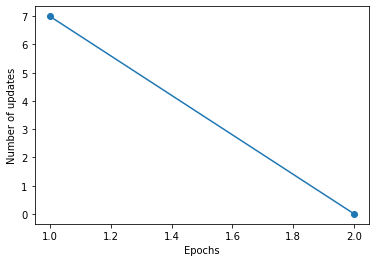

In [ ]:
# Question 2(iii) - Convergence Pattern 1 - random_state = 5
ppn = Perceptron(eta=0.0001,  random_state=5)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

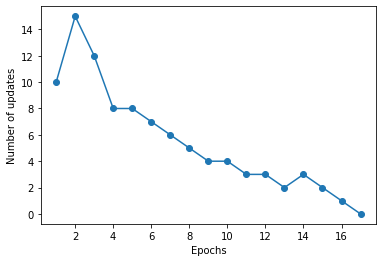

In [ ]:
# Question 2(iii) - Convergence Pattern 2 - random_state = 2
ppn = Perceptron(eta=0.0001,  random_state=2)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

In [ ]:
# Grader's area

maxScore = maxScore +12
M[2,1] = 4
M[2,2] =4
M[2,3] =4

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 3: Visualizing multiple decision regions over time**

Here is the function for visualizing decision regions

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

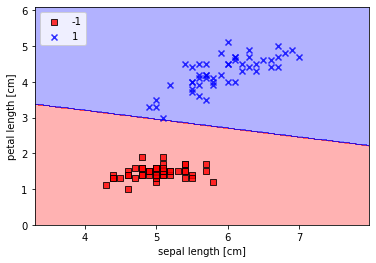

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 5 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

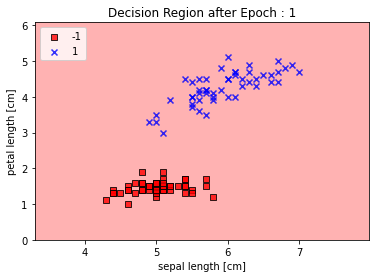

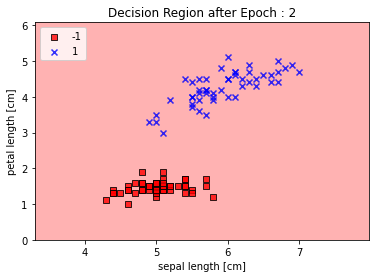

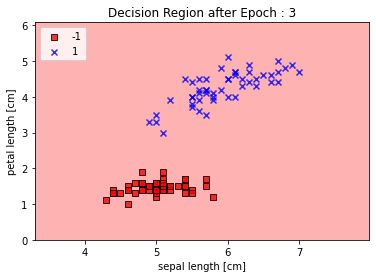

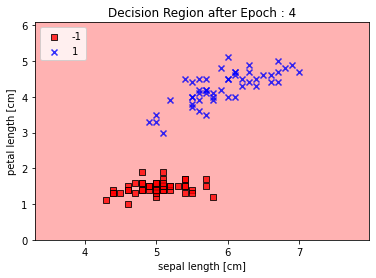

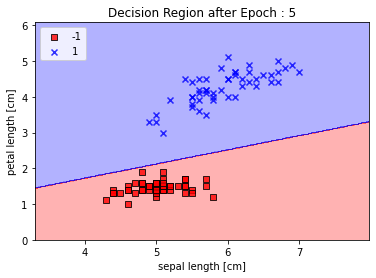

In [ ]:
for i in range(5):
    ppn5 = Perceptron(eta=0.01, n_iter=i+1, random_state=1)
    ppn5.fit(X,y)

    plot_decision_regions(X, y, classifier=ppn5)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.title('Decision Region after Epoch : {}'.format(i+1))

    # plt.savefig('images/02_08.png', dpi=300)
    plt.show()


In [ ]:
# Grader's area

maxScore = maxScore +4
M[3,1] = 4


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 4: Changing the data order in training**



The data arrays (X,y) currently in the memory are organized so that the all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X,y). In this question we will check the impact of changing the order of the data in the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (also called permutation) of the data). Please look up the particular functions of the code, see how they work and then do the required modification and uncomment/evaluate the code.

In [ ]:
# establish a random shuffle
s = np.arange(X.shape[0])
np.random.shuffle(s)
# shuffle sample
X_shuffle = X[s];
y_shuffle = y[s];


In [ ]:
print(s)

[88 36 12 16 57 59 14 82 96 52 17 66 15 55  8 13 54 86  9 31 38 61  6 24
 30 34 62  7  1 87 79 83 43 56 69 93 65 73 40 42 89 26 19  5 95 84 64 92
 81 74  0  2 49 72 29 27  3 45 18 47 90 10 75 37 60 80 85 35 28 67 77 78
  4 91 99 71 11 70 41 50 20 76 51 46 53 44 33 25 68 23 22 63 39 58 21 32
 94 48 98 97]


Modify the code below as follows: <br>
(i) Pick a sufficiently small $\eta$ so that convergences takes 20 iterations or more <br>
(ii) Add an extra line that fits the perceptron on the shuffled data <br>
(iii) Plot the error for both training processes (the original, and the shuffled ata) <br>

What do you observe?

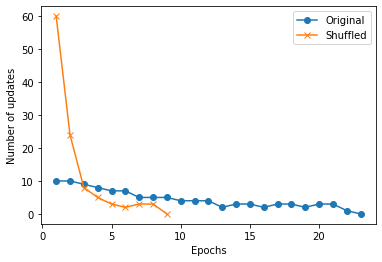

In [ ]:
ppn5 = Perceptron(eta=0.00004, n_iter=50, random_state=1)
ppn5.fit(X, y)

ppn_shuffle = Perceptron(eta=0.00004, n_iter=50, random_state=1)
ppn_shuffle.fit(X_shuffle, y_shuffle)

plt.plot(range(1, len(ppn5.errors_) + 1), ppn5.errors_, marker='o', label = 'Original')
plt.plot(range(1, len(ppn_shuffle.errors_) + 1), ppn_shuffle.errors_, marker='x',label = 'Shuffled')

#refx = [5, 5, 5, 5]
#refy = [-5, 0, 50, 70]

#plt.plot(refx,refy,label = 'Convergence for Shuffled')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.legend()

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# -- Give your answers here

(i) Pick a sufficiently small $\eta$ so that convergences takes 20 iterations or more <br>
Chose eta to be 0.00004 <br>
<br>
(ii) Add an extra line that fits the perceptron on the shuffled data <br>
Added the line to to show the convergence pattern for the shuffled data <br>
<br>
(iii) Plot the error for both training processes (the original, and the shuffled ata) <br>
Plot above <br>
<br>
What do you observe? <br>
<br>
Covergence pattern differs between the original dataset and the shuffled dataset. The shuffled dataset fit converged at 5th iteration whereas the original dataset converged at 24th iteration for the same eta.
<br>
<br>
This implies that the order of the training dataset plays an important role in training of a Perceptron and directly affects the number of iterations needed to train a correct perceptron. In this case of shuffle, it reduced number of iterations needed for the fit.

<br>
<br>
<br>

In [ ]:
# Grader's area

maxScore = maxScore +12
M[4,1] = 4
M[4,2] = 4
M[4,3] = 4

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 5: Understanding linear transformations**

Suppose we have a 2-dimensional data set. Then we transform each data point $X_j = (X_{j,1}, X_{j,2})$ as follows: $\tilde{X_j} = ( a X_{j,1} - c, b X_{j,2}-c)$, where $a,b,c$ are constant numbers. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.


If our given data set is linearly separable, is the same true for the transformed one? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a, b, c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set?

In [ ]:
# Transform the Iris dataset, Multiply by constants and subtract by a constant
# Choice a = 5, b = 4, c=2
a = 5
b = 4
c = 2

Xtrans = df.iloc[:100, [0, 2]].values

# Pre transform spot check
print(Xtrans[0:2])

[[5.1 1.4]
 [4.9 1.4]]


In [ ]:
# Applying linear transformations
Xtrans[:,0] *= a
Xtrans[:,1] *= b
Xtrans -= c

In [ ]:
# Post transform spot check
Xtrans[0:2]

array([[23.5,  3.6],
       [22.5,  3.6]])

Text(0.5, 1.0, 'Original Iris data')

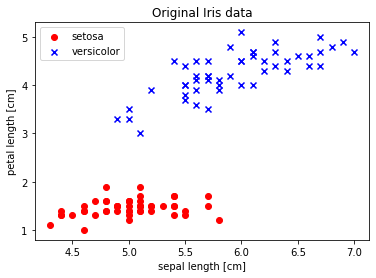

In [ ]:
# plot Original data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Original Iris data')

Text(0.5, 1.0, 'Transformed Iris data')

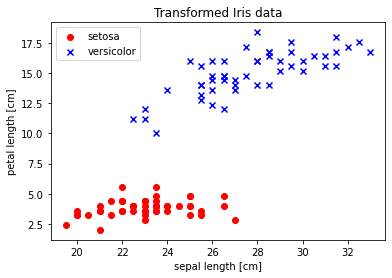

In [ ]:
# plot Transformed data
plt.scatter(Xtrans[:50, 0], Xtrans[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(Xtrans[50:100, 0], Xtrans[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Transformed Iris data')

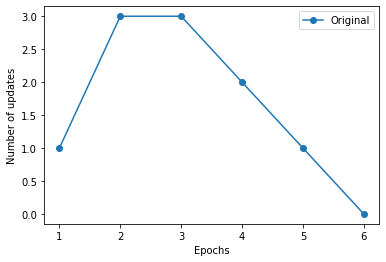

In [ ]:
# plot of convergence pattern for Original dataset

ppn_orig = Perceptron(n_iter=50, random_state=1)
ppn_orig.fit(X, y)

plt.plot(range(1, len(ppn_orig.errors_) + 1), ppn_orig.errors_, marker='o', label = 'Original')
#plt.plot(range(1, len(ppn_trans.errors_) + 1), ppn_trans.errors_, marker='x', label = 'Transformed')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.legend()

plt.show()

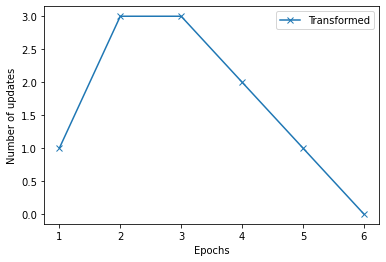

In [ ]:
# plot of convergence pattern for transformed dataset

ppn_trans = Perceptron( n_iter=50, random_state=1)
ppn_trans.fit(Xtrans, y)

#plt.plot(range(1, len(ppn_orig.errors_) + 1), ppn_orig.errors_, marker='o', label = 'Original')
plt.plot(range(1, len(ppn_trans.errors_) + 1), ppn_trans.errors_, marker='x', label = 'Transformed')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.legend()

plt.show()

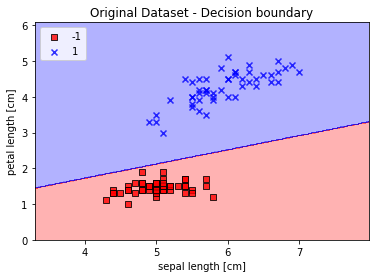

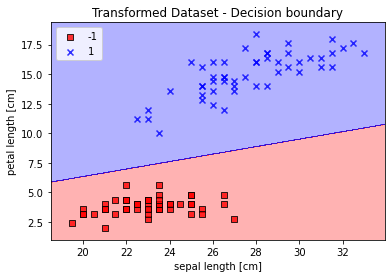

In [ ]:
# Decision boundary for the Original vs Transformed dataset.
# This clearly shows both original and the transformed dataset are linearly separable

plot_decision_regions(X, y, classifier=ppn_orig)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title("Original Dataset - Decision boundary")

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

###########################################################
plot_decision_regions(Xtrans, y, classifier=ppn_trans)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title("Transformed Dataset - Decision boundary")

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [ ]:
# Display the weights of the original dataset fit
print("Final weights for original dataset: {}".format(ppn_orig.w_))
# Display the weights of the original dataset fit
print("Final weights for transformed dataset: {}".format(ppn_trans.w_))

Final weights for original dataset: [-0.02375655 -0.07011756  0.17671828]
Final weights for transformed dataset: [-0.02375655 -0.25611756  0.81071828]


<b>Observation</b>
    <br>

By eyeballing at the scatter plot for the original dataset, we can infer that the  original dataset is linearly separable. Also, the plot of "Epochs Vs Number of updates" shows that Original dataset converges at 6th iteration for eta=0.01 (i.e, number of errors becomes 0 at 6th iteration).

The scatter plot for transformed dataset is similar to the original except the increase in x and y values (magnitude increase). The transformed dataset converges at 6th iteration for eta=0.01.  Both these points and the plots above prove that the transformed dataset is linearly separable as well.

This proves that given the original dataset is linearly separable, linear transformation does increase the magnitude but does not affect the nature of linear separability.

In [ ]:
# Grader's area

maxScore = maxScore +4
M[5,1] = 4


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 6: Linear regression with numpy 1-liners**

In [ ]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3)
y = np.random.randn(10,1)

# we also initialize a hypothetical hyperplane defined by w and b
w = np.random.randn(1,3)
b = -1


In [ ]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here

# instead of matmul, np.dot can also be used

y_predicted = np.matmul(X, w.T) + b
print(y_predicted)

[[ 0.27204388]
 [-5.71303655]
 [-3.80154117]
 [-0.46238381]
 [-2.12142951]
 [-3.83294724]
 [-0.92249109]
 [-2.28832551]
 [ 0.50946617]
 [ 0.89909048]]


In [ ]:
# Alternate way to calculate using numpy.
# In this expression we add ones as first element in X and b as first element to the vector w
# to make multiplication easier with b
y_predicted = np.dot(np.vstack((np.ones((X.shape[0], )), X.T)).T, np.column_stack((np.asarray([b]),w)).T)
print(y_predicted)

[[ 0.27204388]
 [-5.71303655]
 [-3.80154117]
 [-0.46238381]
 [-2.12142951]
 [-3.83294724]
 [-0.92249109]
 [-2.28832551]
 [ 0.50946617]
 [ 0.89909048]]


In [ ]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line

Considering the below rule for weight updates

$$
     w_i = w_i - \rho \sum_{j=1}^n  \left( \hat{y}_j - y_j\right ) X_{j,i}
$$

In [ ]:
# Calculate weights as per the presudocode for the gradient descent given in lecuture and per the update rule mentioned above
# instead of matmul, np.dot can also be used

wnew = w - np.matmul((y_predicted-y).T,X)* 0.1
print("Weights after one application of gradient descent : {}".format(wnew))

Weights after one application of gradient descent : [[ 0.58786617 -1.61552026 -1.20987173]]


Considering the below rule for b

$$
     b = b - \rho \sum_{j=1}^n  \left( \hat{y}_j - y_j\right )
$$


In [ ]:
bnew = b - np.matmul((y_predicted-y).T,np.ones((X.shape[0], ))) * 0.1
print("b value after one application of gradient descent : {}".format(bnew))

b value after one application of gradient descent : [0.90543013]


In [ ]:
# Grader's area

maxScore = maxScore +8
M[6,1] = 4
M[6,2] = 4


-----------------------
-----------------------
-----------------------


In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore

In [ ]:
score

96.42857142857143